In [1]:
# Import pandas, matplotlib/seaborn and textblob.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from textblob import TextBlob

In [2]:
# Read the data into a dataframe with pandas.
df = pd.read_csv("reviews.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
# Filter the dataframe to a relevant subset of columns required for our data scenario.
df = df.drop(["Unnamed: 0", "Clothing ID", "Age", "Recommended IND", "Positive Feedback Count", "Class Name"], axis=1)

In [5]:
# Use df.columns.str.lower() - or another preferred method - to standardise your column headers.
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(" ", "_")

# Better alternative
# df.columns = [col.lower().replace(" ", "_") for col in df.columns] 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review_text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division_name    23472 non-null  object
 4   department_name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [7]:
# Use groupby() to summarise the average rating
# by division and department as a new dataframe.
df_rating = df.groupby(["division_name", "department_name"], as_index=False).mean()
df_rating

,division_name,department_name,rating
0,General,Bottoms,4.268686
1,General,Dresses,4.163003
2,General,Jackets,4.240310
3,General,Tops,4.148749
4,General,Trend,3.822917
5,General Petite,Bottoms,4.329356
6,General Petite,Dresses,4.133256
7,General Petite,Intimate,4.240343
8,General Petite,Jackets,4.304910
9,General Petite,Tops,4.216469


In [8]:
df_rating["div_dep"] = df_rating["division_name"] + " - " + df["department_name"]

In [9]:
df_rating = df_rating.drop(["division_name", "department_name"], axis=1)
df_rating

,rating,div_dep
0,4.268686,General - Intimate
1,4.163003,General - Dresses
2,4.240310,General - Dresses
3,4.148749,General - Bottoms
4,3.822917,General - Tops
5,4.329356,General Petite - Dresses
6,4.133256,General Petite - Tops
7,4.240343,General Petite - Tops
8,4.304910,General Petite - Dresses
9,4.216469,General Petite - Dresses


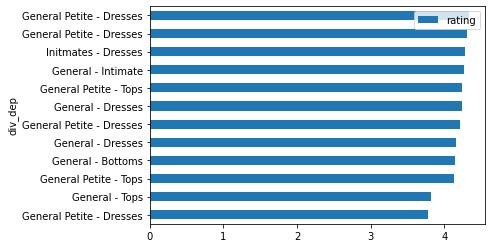

In [10]:
# This dataframe can be easily visualised as a bar chart - do so now.
df_rating.sort_values(by="rating",ascending=True).plot(x="div_dep", kind="barh")

In [11]:
# Do a spot/sample check on the review column, index position 5 (hint: iloc/loc/at)
# to apply textblob over the selected review text. 
# Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and 
# subjectivity against the text itself.
testimonial_6 = TextBlob(df["review_text"].iloc[5])
testimonial_6

TextBlob("I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.")

In [12]:
testimonial_6.sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [13]:
testimonial_20 = TextBlob(df["review_text"].iloc[19])
testimonial_20

TextBlob("I love the look and feel of this tulle dress. i was looking for something different, but not over the top for new year's eve. i'm small chested and the top of this dress is form fitting for a flattering look. once i steamed the tulle, it was perfect! i ordered an xsp. length was perfect too.")

In [14]:
testimonial_20.sentiment

Sentiment(polarity=0.4318181818181818, subjectivity=0.6171717171717171)

In [15]:
testimonial_3 = TextBlob(df["review_text"].iloc[2])
testimonial_3

TextBlob("I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c")

In [16]:
testimonial_3.sentiment

Sentiment(polarity=0.07367494824016563, subjectivity=0.35629399585921323)

In [17]:
# For any selected customer review, use textblob to break out the text into sentences.
testimonial_6.sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [18]:
# Using dropna(), remove any rows in your data which contain have null in the review column.
df = df.dropna(subset=["review_text"])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19675 non-null  object
 1   review_text      22641 non-null  object
 2   rating           22641 non-null  int64 
 3   division_name    22628 non-null  object
 4   department_name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [20]:
# Define a function with lambda - or another preferred method - to calculate sentiment polarity
# for each row of the filtered review dataset, as a new column on the dataframe. 
df["sentiment"] = df["review_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [21]:
df.head()

,title,review_text,rating,division_name,department_name,sentiment
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


In [22]:
# Using groupby() again, summarise the minimum review polarity, by division and department as a new dataframe.
df_polarity_min = df.groupby(["division_name", "department_name"], as_index=False)["sentiment"].min()
df_polarity_min

,division_name,department_name,sentiment
0,General,Bottoms,-0.533333
1,General,Dresses,-0.916667
2,General,Jackets,-0.750000
3,General,Tops,-0.975000
4,General,Trend,-0.270833
5,General Petite,Bottoms,-0.257778
6,General Petite,Dresses,-0.400000
7,General Petite,Intimate,-0.575000
8,General Petite,Jackets,-0.562500
9,General Petite,Tops,-0.700000


In [23]:
df_polarity_min["div_dep"] = df["division_name"] + " - " + df["department_name"]

In [24]:
df_polarity_min = df_polarity_min.drop(["division_name", "department_name"], axis=1)
df_polarity_min

,sentiment,div_dep
0,-0.533333,Initmates - Intimate
1,-0.916667,General - Dresses
2,-0.750000,General - Dresses
3,-0.975000,General Petite - Bottoms
4,-0.270833,General - Tops
5,-0.257778,General - Dresses
6,-0.400000,General Petite - Tops
7,-0.575000,General Petite - Tops
8,-0.562500,General - Dresses
9,-0.700000,General - Dresses


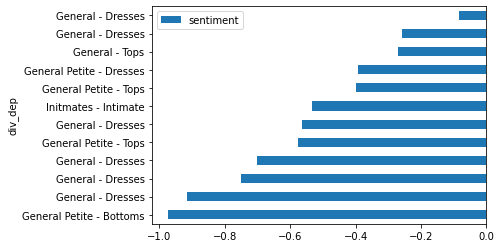

In [25]:
# Visualise this summary as a simple sorted bar chart.
df_polarity_min.sort_values(by="sentiment",ascending=True).plot(x="div_dep", kind="barh")

In [26]:
# Using groupby() again, summarise the average review polarity, by division and department as a new dataframe.
df_polarity_avg = df.groupby(["division_name", "department_name"], as_index=False)["sentiment"].mean()
df_polarity_avg

,division_name,department_name,sentiment
0,General,Bottoms,0.245849
1,General,Dresses,0.251091
2,General,Jackets,0.237141
3,General,Tops,0.247025
4,General,Trend,0.203986
5,General Petite,Bottoms,0.259258
6,General Petite,Dresses,0.248380
7,General Petite,Intimate,0.239517
8,General Petite,Jackets,0.241773
9,General Petite,Tops,0.256835


In [27]:
df_polarity_avg["div_dep"] = df["division_name"] + " - " + df["department_name"]

In [28]:
df_polarity_avg = df_polarity_avg.drop(["division_name", "department_name"], axis=1)
df_polarity_avg

,sentiment,div_dep
0,0.245849,Initmates - Intimate
1,0.251091,General - Dresses
2,0.237141,General - Dresses
3,0.247025,General Petite - Bottoms
4,0.203986,General - Tops
5,0.259258,General - Dresses
6,0.248380,General Petite - Tops
7,0.239517,General Petite - Tops
8,0.241773,General - Dresses
9,0.256835,General - Dresses


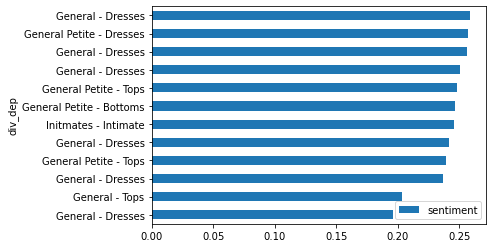

In [29]:
# Visualise this summary as a simple sorted bar chart.
df_polarity_avg.sort_values(by="sentiment",ascending=True).plot(x="div_dep", kind="barh")